In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, classification_report, make_scorer
)
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# matplotlib 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자는 AppleGothic
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 설정

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    make_scorer
)
import matplotlib.pyplot as plt

# matplotlib 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자는 AppleGothic
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 설정

# 1. 데이터 불러오기
data = pd.read_csv('./data/data.csv')

# 2. 데이터 전처리
data['Engagement'] = data['Level'].map(lambda x: 1 if x == 'AE' else 0)  # AE: High, NE/PE: Low
X = data.drop(columns=['Level', 'Engagement'])
y = data['Engagement']

# 훈련에 사용된 변수명 출력
print("훈련에 사용된 변수명:")
print(X.columns.tolist())

# 3. 모델 선언
rf_model = RandomForestClassifier(random_state=42)

# 4. 교차 검증
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

print("\nCross-Validation Results:")
for metric, scorer in scoring.items():
    scores = cross_val_score(rf_model, X, y, cv=5, scoring=scorer)
    print(f"{metric.capitalize()}: {np.mean(scores):.4f}")

# AUC를 위한 예측 확률값 계산
y_pred_cv = cross_val_predict(rf_model, X, y, cv=5, method="predict_proba")[:, 1]
auc_cv = roc_auc_score(y, y_pred_cv)
print(f"AUC (Cross-Validation Predict): {auc_cv:.4f}")

# 5. 학습 및 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 훈련 데이터 및 테스트 데이터 개수 출력
print("\n데이터셋 크기:")
print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

rf_model.fit(X_train, y_train)

# 6. 모델 평가
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nTest Set Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

훈련에 사용된 변수명:
['Total_Items', 'Time_Spent_ in Course', 'Total_Logins', 'Activity_inside_content_ area', 'User_Activity_in_Goup', 'Nbre_of_clics', 'Nbre_of_ message_ participation', 'join_session', 'Time_Spent_on_Session_Attendence']

Cross-Validation Results:
Accuracy: 0.9200
Precision: 0.9381
Recall: 0.8286
F1: 0.8707
Roc_auc: 0.9780
AUC (Cross-Validation Predict): 0.9768

데이터셋 크기:
훈련 데이터: 80개
테스트 데이터: 20개

Test Set Results:
Accuracy: 0.9000
Precision: 0.8571
Recall: 0.8571
F1 Score: 0.8571
AUC: 0.9560


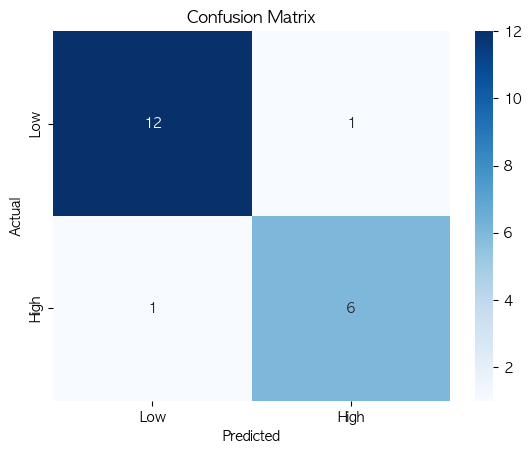

In [7]:
# 7. Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

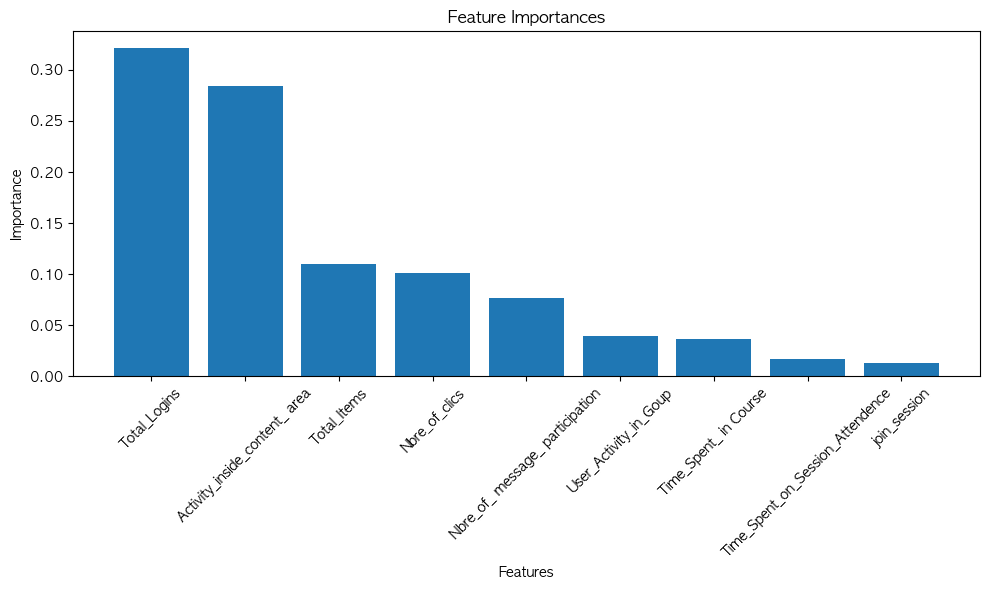

In [8]:
# 8. Feature Importance 시각화
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()